In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import calendar

In [2]:
df = pd.read_csv('fcc-forum-pageviews.csv', index_col="date", parse_dates=True)
df

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933
...,...
2019-11-29,171584
2019-11-30,141161
2019-12-01,142918


In [3]:
page_view_upper_treshold = df['value'].quantile(0.975)
page_view_lower_treshold = df['value'].quantile(0.025)

df = df[
  (df['value'] > page_view_lower_treshold) &
  (df['value'] < page_view_upper_treshold)
]
df

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


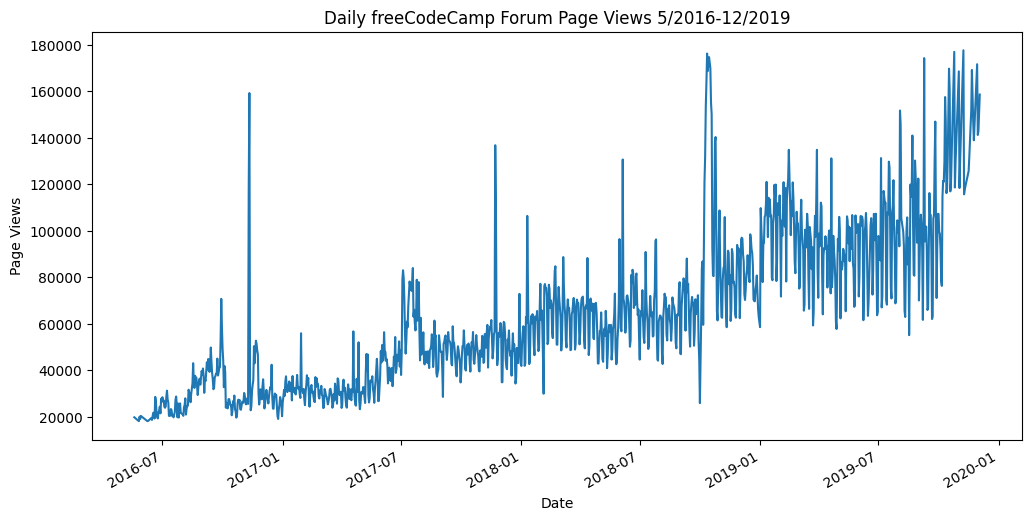

In [4]:
fig = df.plot(
  kind="line", 
  xlabel="Date", 
  ylabel="Page Views", 
  title="Daily freeCodeCamp Forum Page Views 5/2016-12/2019",
  legend=False,
  figsize=(12,6)
  ).get_figure()

fig.savefig('line_plot.png')

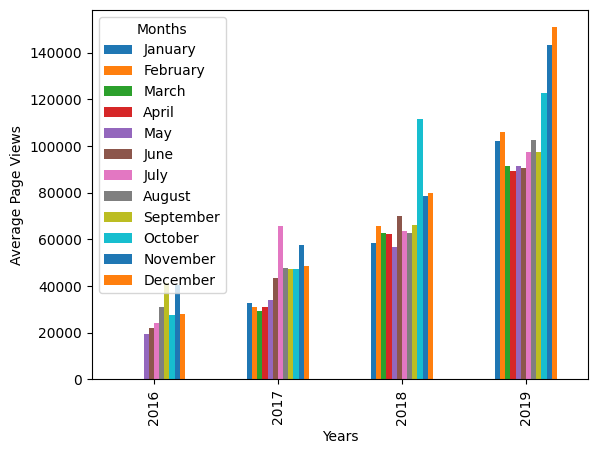

In [5]:
df_bar = df.groupby([df.index.year, df.index.month_name()])['value'].mean().unstack()
df_bar = df_bar[list(calendar.month_name)[1:]]
df_bar.columns.name = 'Months'
fig = df_bar.plot(
  kind="bar", 
  xlabel="Years", 
  ylabel="Average Page Views"
  ).get_figure()
fig.savefig('bar_plot.png')


In [6]:
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: 

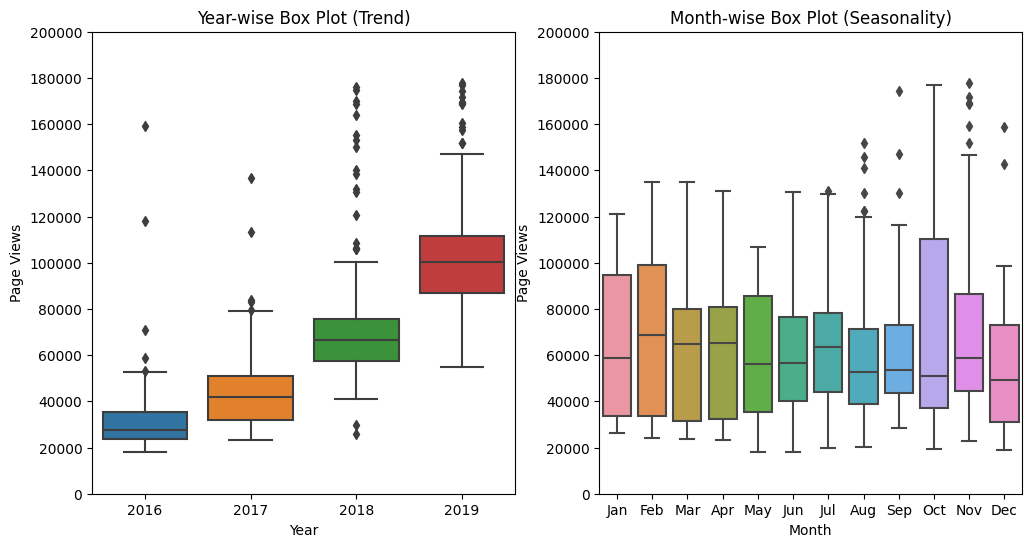

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

boxplot_1 = sns.boxplot(
  data=df_box,
  x='year',
  y='value',
  ax=axes[0]
)

boxplot_1.set(
  xlabel="Year",
  ylabel="Page Views",
  title="Year-wise Box Plot (Trend)",
  ylim=(0, 200000),
  yticks=range(0, 200001, 20000)
)

boxplot_2 = sns.boxplot(
  data=df_box,
  x='month',
  y='value',
  order=list(month[:3] for month in calendar.month_name)[1:],
  ax=axes[1]
)

boxplot_2.set(
  xlabel='Month',
  ylabel='Page Views',
  title='Month-wise Box Plot (Seasonality)',
  ylim=(0, 200000),
  yticks=range(0, 200001, 20000),
)

plt.show()
fig.savefig('box_plot.png')